In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_friedman1
from scipy.optimize import least_squares

(100, 2)


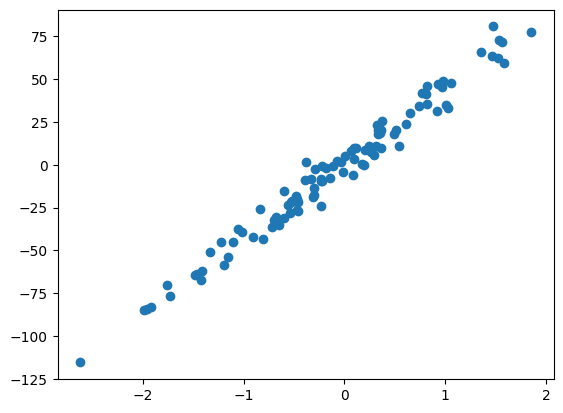

In [165]:
x, y = make_regression(100, 1, noise=7, shuffle=True, random_state=42)

data = np.hstack((x, y.reshape(-1, 1)))
print(data.shape)
plt.scatter(data[:,0], data[:,1])

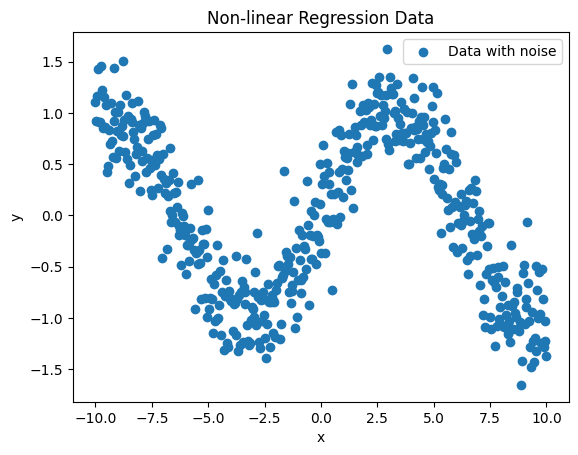

In [166]:
# Generate non-linear (sinusoidal) regression data
np.random.seed(42)  # For reproducibility
n_samples = 500
noise = 3

# Generate x values
x = np.linspace(-10, 10, n_samples)

# Generate y values using a sinusoidal function (e.g., y = sin(x) + noise)
y = np.sin(.5*x) + np.random.normal(0, noise / 10, n_samples)  # Less noise for better visualization

# Plot the data
plt.scatter(x, y, label="Data with noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Non-linear Regression Data")
plt.show()
data = np.hstack((x.reshape(-1, 1), y.reshape(-1, 1)))


In [167]:
def prediction(params, x):
    return params[0] + params[1] * x + params[2] * x**2 + params[3] * x**3

In [168]:
def cost_function(params, x, y):
    y_pred = prediction(params, x)
    return y_pred - y
initial_params = [0, 0, 0, 0]
result = least_squares(cost_function, initial_params, args=(data[:, 0], data[:, 1]))
w = result.x
residuals = prediction(w, data[:, 0]) - data[:, 1]
variance = np.mean(residuals**2)
print(variance)

0.21328990866998618


(500,)


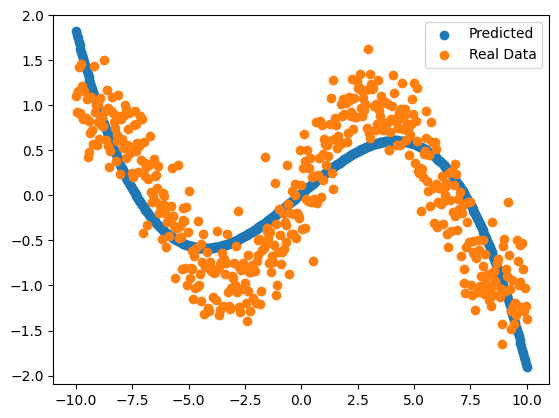

In [ ]:
y_pred = prediction(w, data[:, 0])
plt.scatter(data[:,0], y_pred, label="Predicted")
plt.scatter(data[:,0], data[:,1], label="Real Data")
plt.legend()
plt.show()